# 1 - Introduction

Name : Gilang Wiradhyaksa

Data : [Credit Card Information](https://console.cloud.google.com/bigquery?p=ftds-hacktiv8-project&d=phase1_ftds_001_sby&t=credit-card-information&page=table)

Objective : The purpose of this project is to create an unsupervised machine learning to create a cluster for credit card user. Data set used is Credit Card Information from Google BigQuery. The model used in this project is `K-Means` , to create a customer segmentation based on their credit card usage.

# 2 - Import Libraries

In [880]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

# 3 - Data Loading

Data load from Google BigQuery with SQL as follows :
```sql
SELECT * FROM ftds-hacktiv8-project.phase1_ftds_001_sby.`credit-card-information`
WHERE mod(CUST_ID, 2) != 0
```

In [881]:
#Data Asli
df_ori = pd.read_csv('cc_customer_segmentation.csv')
pd.set_option('display.max_columns', None)

In [882]:
df = df_ori.copy()
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


In [883]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


In [884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

In [885]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [886]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [887]:
# Check duplicated data
df.duplicated().sum()

0

There is no duplicated data in this dateset.

In [888]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 155 null value in column `minimum_payment` we weill handle this in the feature engineering part.

# 4 - Exploratory Data Analysis (EDA)

In [889]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


## 4.1 - Numerical Column

In [890]:
def exploreNumCol(df,  col):
    mean = df[col].mean()
    median = df[col].median()
    modus = df[col].mode().values[0]

    min = df[col].min()
    max = df[col].max()

    print(f'Mean {col} = {mean:.2f}')
    print(f'Median {col} = {median}')
    print(f'Modus {col} = {modus}')
    print(f'Min {col} = {min}')
    print(f'Max {col} = {max}')

    skew = df[col].skew()
    if skew < 0.5:
        print(f'Skewness {col} = {skew}, data distribution is normal')
    else:
        print(f'Skewness {col} = {skew}, data distribution is not normal')

### 4.1.1 - Purchases

In [891]:
exploreNumCol(df, 'PURCHASES')

Mean PURCHASES = 1003.25
Median PURCHASES = 360.0
Modus PURCHASES = 0.0
Min PURCHASES = 0.0
Max PURCHASES = 41050.4
Skewness PURCHASES = 7.071705718331177, data distribution is not normal


[Text(0.5, 1.0, 'Credit Card Purchases')]

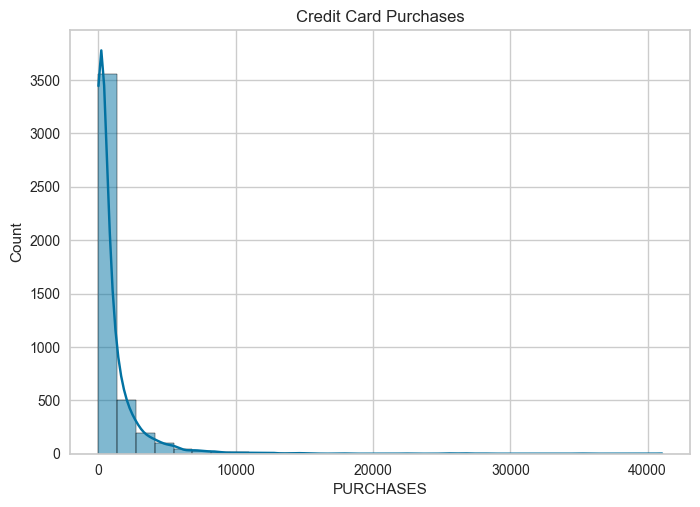

In [892]:
sns.histplot(df['PURCHASES'], bins=30, kde=True).set(title='Credit Card Purchases')

As we can see from the histogram, most of the customer make a purchase under 400. But the average of purchase is high because there is someone who make a purchase with a very high amount of money which is 41000. While the rest of the customer purchase transaction is no more than 1000.

In [893]:
data_purchase = {
    'Zero Purchase': len(df[df['PURCHASES'] == 0]),
    'More than zero': len(df[df['PURCHASES'] > 0])
}

In [894]:
df_purchases = pd.DataFrame()
df_purchases['count_customer'] = data_purchase
df_purchases

,count_customer
Zero Purchase,1022
More than zero,3453


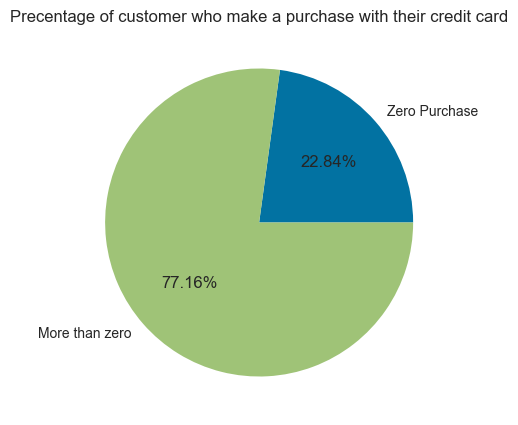

In [895]:
fig, ax = plt.subplots(ncols=1, figsize=(15, 5))
ax.pie(df_purchases['count_customer'], labels=df_purchases['count_customer'].index, autopct='%.2f%%')
ax.set_title("Precentage of customer who make a purchase with their credit card")
plt.show()

As we can see from the data above, 77.16% customer is using their credit card at least once to make a purchase. Only 22.84% of customer whose didn't make any purchase.

### 4.1.2 - Credit Limit

In [896]:
exploreNumCol(df, 'ONEOFF_PURCHASES')

Mean ONEOFF_PURCHASES = 596.37
Median ONEOFF_PURCHASES = 45.65
Modus ONEOFF_PURCHASES = 0.0
Min ONEOFF_PURCHASES = 0.0
Max ONEOFF_PURCHASES = 40624.06
Skewness ONEOFF_PURCHASES = 9.951056583113456, data distribution is not normal


In [897]:
exploreNumCol(df, 'CREDIT_LIMIT')

Mean CREDIT_LIMIT = 4494.88
Median CREDIT_LIMIT = 3000.0
Modus CREDIT_LIMIT = 3000.0
Min CREDIT_LIMIT = 50.0
Max CREDIT_LIMIT = 30000.0
Skewness CREDIT_LIMIT = 1.498947716941148, data distribution is not normal


From the two data exploration above, we can see that the maximum amount of credit card limit that exist in this data is 30,000. Meanwhile the maximum amount of one-off purchases is more than 40,000, that's surpass the credit limit which is impossible. We will assume this as an input error and handle it on the outlier handling.

[Text(0.5, 1.0, 'Credit Card Limit')]

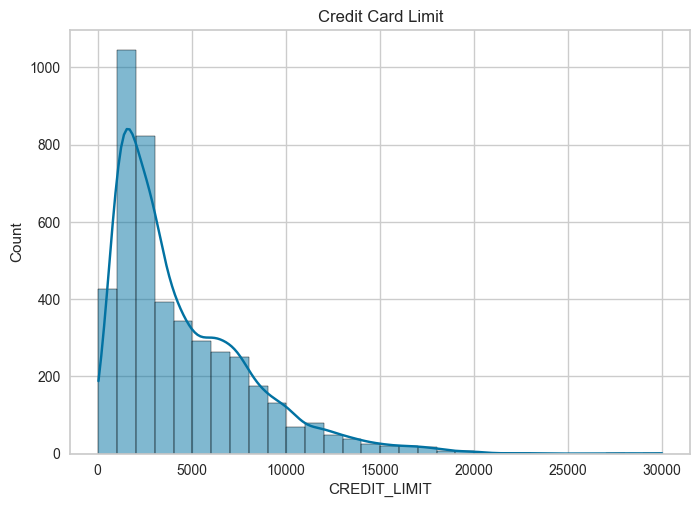

In [898]:
sns.histplot(df['CREDIT_LIMIT'], bins=30, kde=True).set(title='Credit Card Limit')

Credit card limit for most of customer in this dataset is between 0 and 10,000 with the average limit on 4,494. Which majority of them having only 3,000 limit.

# 5 - Feature Engineering

## 5.1 - Feature Selection

In [899]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [900]:
df_formodel = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]
df_formodel

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11


In [901]:
df_formodel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

We decided to not using `CUST_ID` column, since it won't affect the model result.

## 5.2 - Handling Outlier

In [902]:
print('Distribution of column `Purchases`  : ', df_formodel['PURCHASES'].skew())
print('Distribution of column `One Off Purchases`  : ', df_formodel['ONEOFF_PURCHASES'].skew())

Distribution of column `Purchases`  :  7.071705718331177
Distribution of column `One Off Purchases`  :  9.951056583113456


Based on the EDA point 4.1.2 about credit limit, we decided to remove the outlier from column `PURCHASES` and `ONEOFF_PURCHASES` because it has indication of input error since its value suparss the maximum amount of credit card limit.

In [903]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df, bins=30) if variable is None else sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df) if variable is None else sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

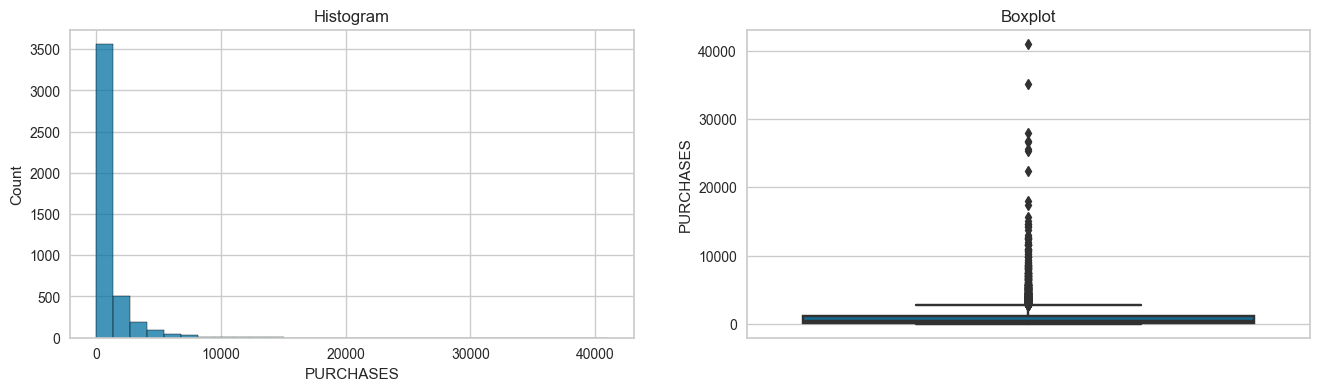

In [904]:
diagnostic_plots(df_formodel, 'PURCHASES')

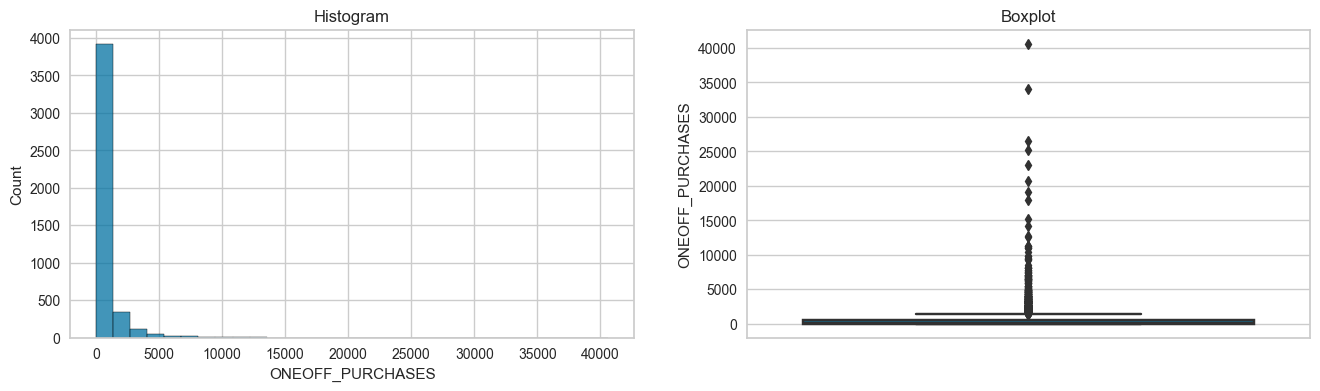

In [905]:
diagnostic_plots(df_formodel, 'ONEOFF_PURCHASES')

In [906]:
def getTukeysRuleBoundary(df, col, iqr_wide):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper_boundary = df[col].quantile(0.75) + (IQR * iqr_wide)
    lower_boundary = df[col].quantile(0.25) - (IQR * iqr_wide)

    print(f'Upper Boundary {col} : {upper_boundary}')
    print(f'Lower Boundary {col} : {lower_boundary}')

    return upper_boundary, lower_boundary,

def getPrecentageOutliers(df, col, upper_b):
    print('Total Data : {}'.format(len(df)))
    print('Data which ' + col + ' more than ' + str(upper_b) + ' : {}'.format(len(df[df[col] > upper_b])))
    print('% Data which ' + col + ' more than ' + str(upper_b) + ' : {}'.format(len(df[df[col] > upper_b])/len(df) * 100))

In [907]:
upper_b_purchases, lower_b_purchases = getTukeysRuleBoundary(df_formodel, 'PURCHASES', 3)
print('')
upper_b_oneoff_purchases, lower_b_oneoff_purchases = getTukeysRuleBoundary(df_formodel, 'ONEOFF_PURCHASES', 3)

Upper Boundary PURCHASES : 4291.0
Lower Boundary PURCHASES : -3149.0200000000004

Upper Boundary ONEOFF_PURCHASES : 2300.88
Lower Boundary ONEOFF_PURCHASES : -1725.66


In [908]:
getPrecentageOutliers(df_formodel, 'PURCHASES', upper_b_purchases)
print('')
getPrecentageOutliers(df_formodel, 'ONEOFF_PURCHASES', upper_b_purchases)

Total Data : 4475
Data which PURCHASES more than 4291.0 : 208
% Data which PURCHASES more than 4291.0 : 4.648044692737431

Total Data : 4475
Data which ONEOFF_PURCHASES more than 4291.0 : 100
% Data which ONEOFF_PURCHASES more than 4291.0 : 2.2346368715083798


In [909]:
# Flag the outliers in column `PURCHASES`
outliers_purchases = np.where(df_formodel['PURCHASES'] > upper_b_purchases, True,
                       np.where(df_formodel['PURCHASES'] < lower_b_purchases, True, False))

# Flag the outliers in column `ONEOFF_PURCHASES`
outliers_oneoff_purchases = np.where(df_formodel['ONEOFF_PURCHASES'] > upper_b_oneoff_purchases, True,
                       np.where(df_formodel['ONEOFF_PURCHASES'] < lower_b_oneoff_purchases, True, False))

# Trimming the dataset
df_trimmed = df_formodel.loc[~(outliers_purchases + outliers_oneoff_purchases)]

# Trimming original dataset
df = df_formodel.loc[~(outliers_purchases + outliers_oneoff_purchases)]

print('Size dataset - Before trimming : ', df_formodel.shape)
print('Size dataset - After trimming  : ', df_trimmed.shape)

Size dataset - Before trimming :  (4475, 17)
Size dataset - After trimming  :  (4149, 17)


Data has been successfully trimmed. Removing outlier from column `Purchases` and `One-off Purchases`

In [910]:
exploreNumCol(df_trimmed, 'PURCHASES')
print('')
exploreNumCol(df_trimmed, 'ONEOFF_PURCHASES')

Mean PURCHASES = 595.39
Median PURCHASES = 300.0
Modus PURCHASES = 0.0
Min PURCHASES = 0.0
Max PURCHASES = 4266.25
Skewness PURCHASES = 1.807992594513556, data distribution is not normal

Mean ONEOFF_PURCHASES = 291.35
Median ONEOFF_PURCHASES = 0.0
Modus ONEOFF_PURCHASES = 0.0
Min ONEOFF_PURCHASES = 0.0
Max ONEOFF_PURCHASES = 2282.59
Skewness ONEOFF_PURCHASES = 1.9860741645056954, data distribution is not normal


As we can see, the maximum amount of column `purchases` and `one-off purchases` is only 4266 and 2282 respectively. This means we have successfully removing the outliers.

## 5.3 - Handling Missing Value

In [911]:
df_trimmed.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    153
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Based on the information above, we have 153 null/empty data in column `minimum payments`. Let's fill it with 0 value, because it is possible to be 0 and the majority of the data in this column is also 0.

In [912]:
df_trimmed['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

Successfully replace column `MINIMUM_PAYMENTS` null data with 0 data.

## 5.4 - Feature Scaling

In [913]:
#Scaling Numerical Column with Skew Data
scaler_mm = MinMaxScaler()
scaler_mm.fit(df_trimmed)

MinMaxScaler()

In [914]:
df_scaled = scaler_mm.transform(df_trimmed)

## 5.5 - Principal Component Analysis (PCA)

In [915]:
pca = PCA()
pca.fit(df_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

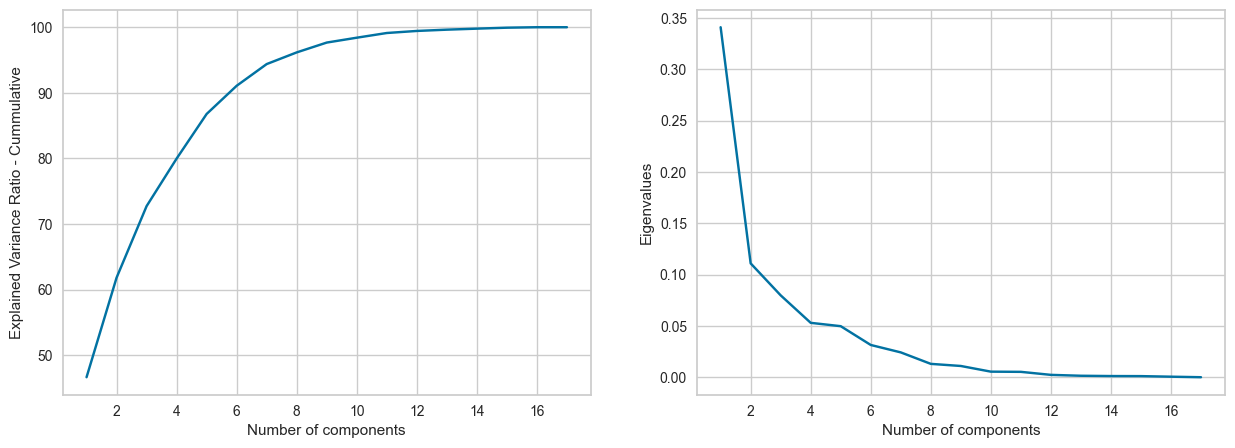

In [916]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(range(1, 18), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(range(1, 18), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

In [917]:
# Check the number of features if we want to retain 95 % of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

8

To retain 95% of the information, we only need 8 features. So we will reduce the features we have from 17 to 8 features.

In [918]:
# Let's train the model with 95 % of the original dataset information
pca = PCA(n_components=0.95)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)

In [919]:
df_scaled_pca.shape

(4149, 8)

PCA success, now our data have only 8 features with the 95% information retained.

## 5.6 - Find the Optimal Number of Clusters (K)

### 5.6.1 - Elbow Method

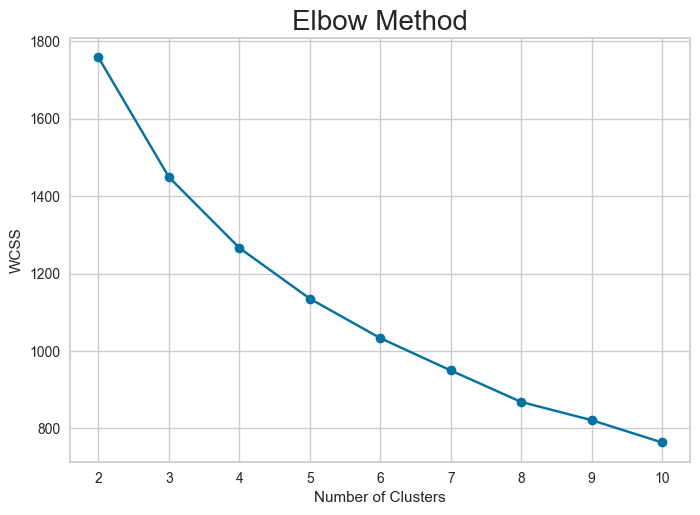

In [920]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 7
max_cluster = 10
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid(True)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Based on the plot above, the location of the elbow is in cluster `4`, but let's use another method to find the optimal number of cluster (K)

### 5.6.2 - Silhoutte Plot & Silhoutte Score

In [921]:
# Function to create Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.3831279230101237
For n_clusters = 3 The average silhouette_score is : 0.3793871559573095


For n_clusters = 4 The average silhouette_score is : 0.3185261570057637
For n_clusters = 5 The average silhouette_score is : 0.30852076686211366
For n_clusters = 6 The average silhouette_score is : 0.3154728725580207
For n_clusters = 7 The average silhouette_score is : 0.3024100479385705
For n_clusters = 8 The average silhouette_score is : 0.30535839781806395
For n_clusters = 9 The average silhouette_score is : 0.31816563739634807


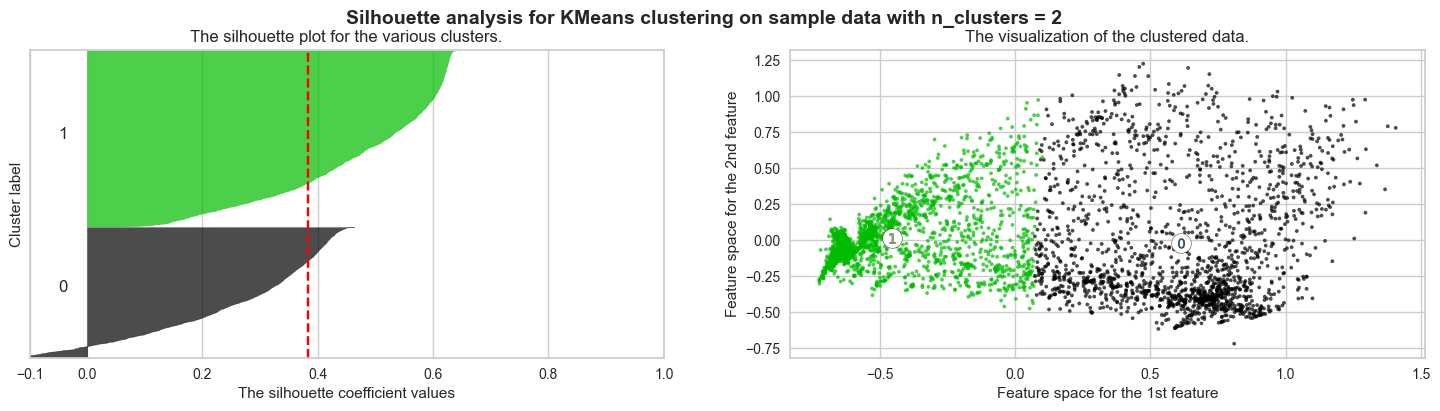

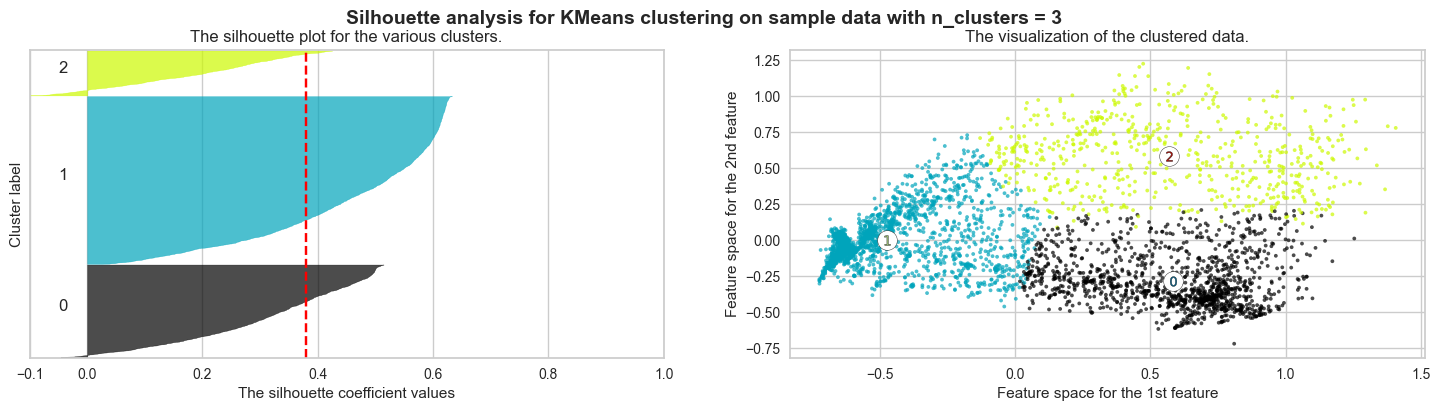

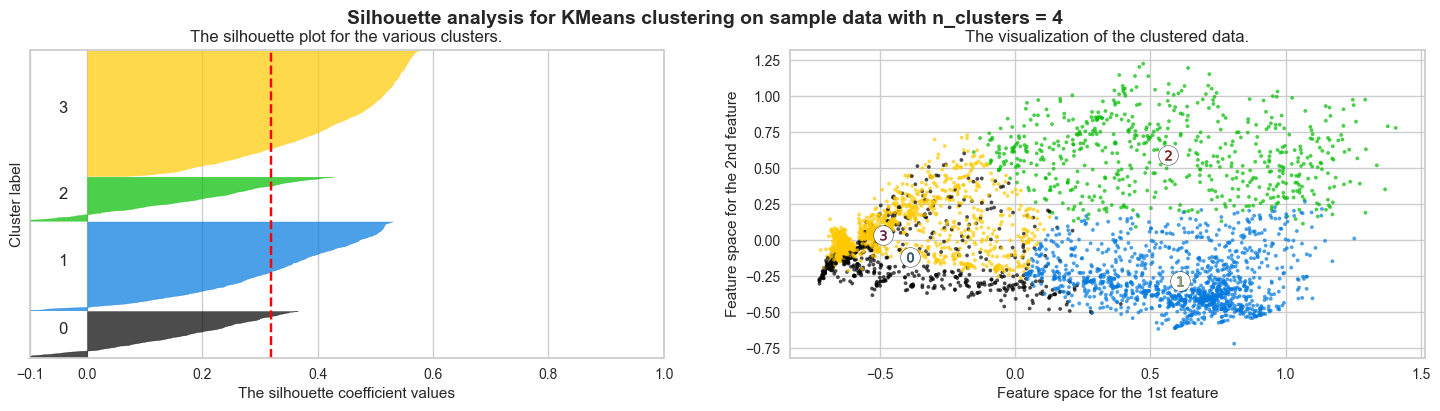

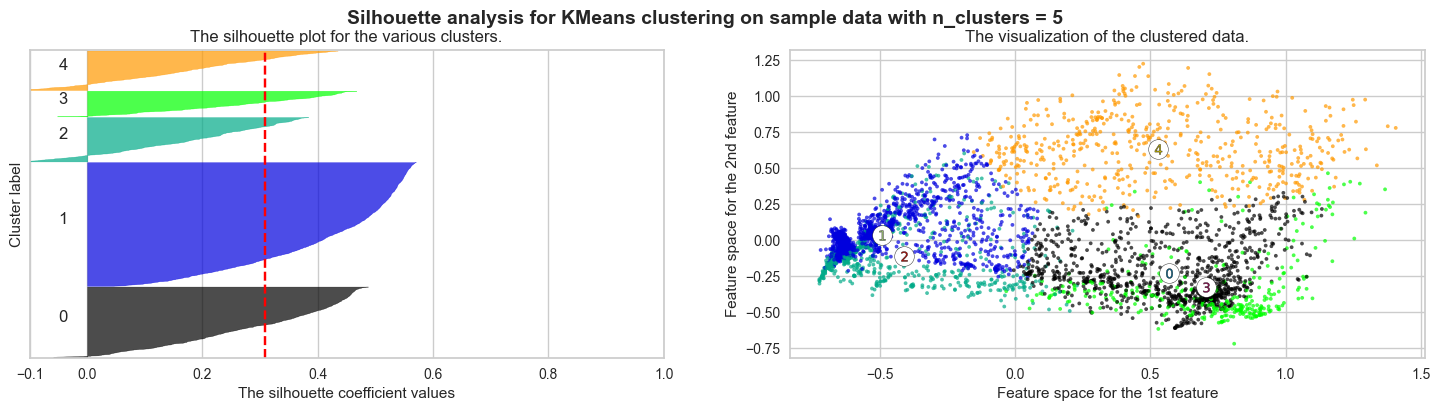

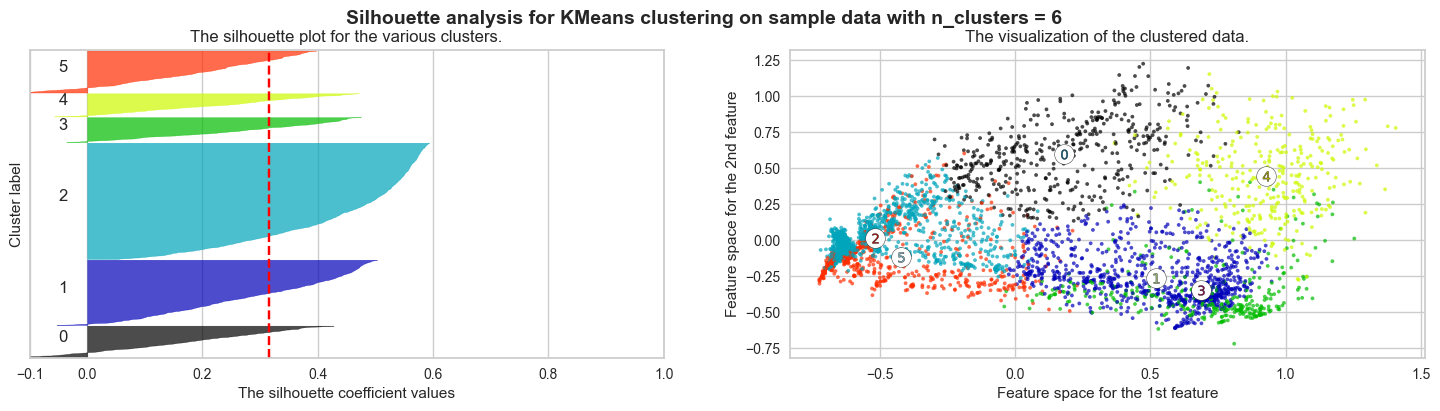

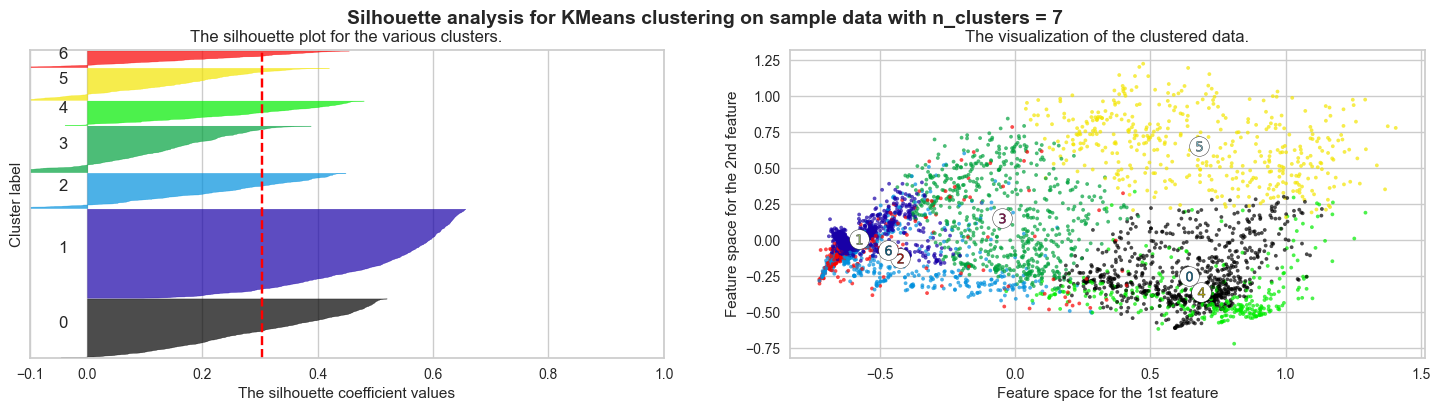

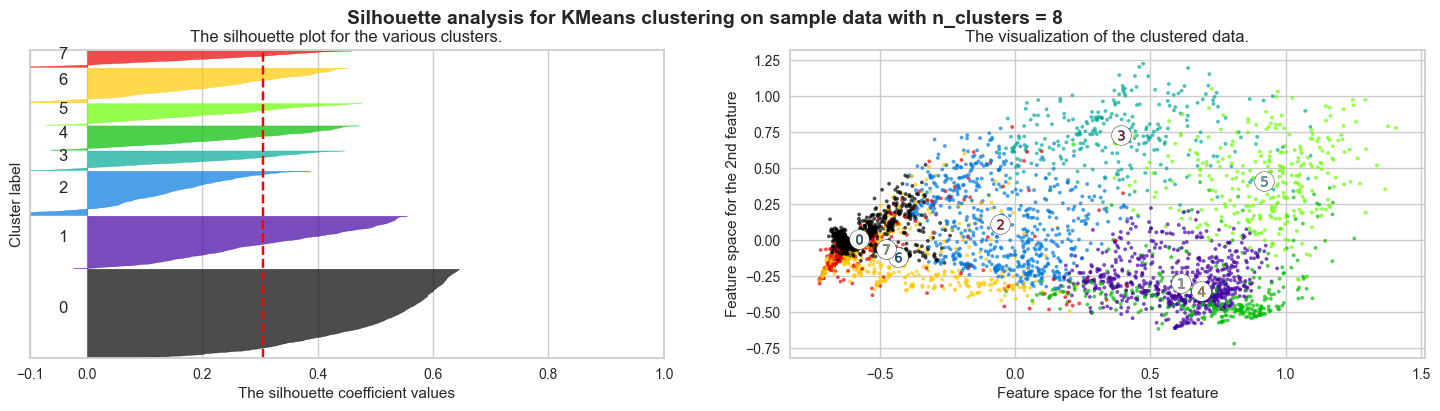

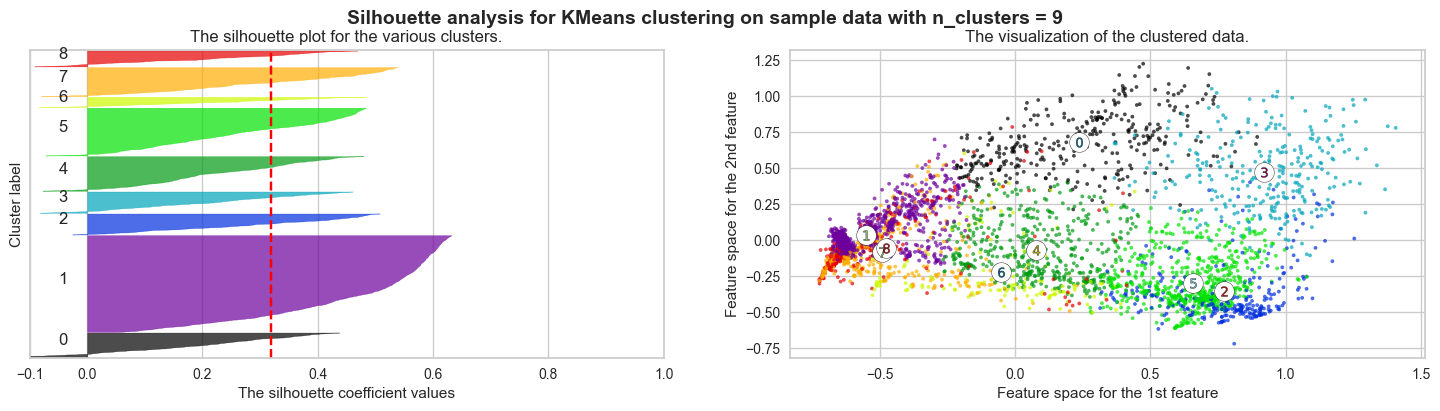

In [922]:
# Display the Silhouette Score and Plot Silhouette Plot
plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

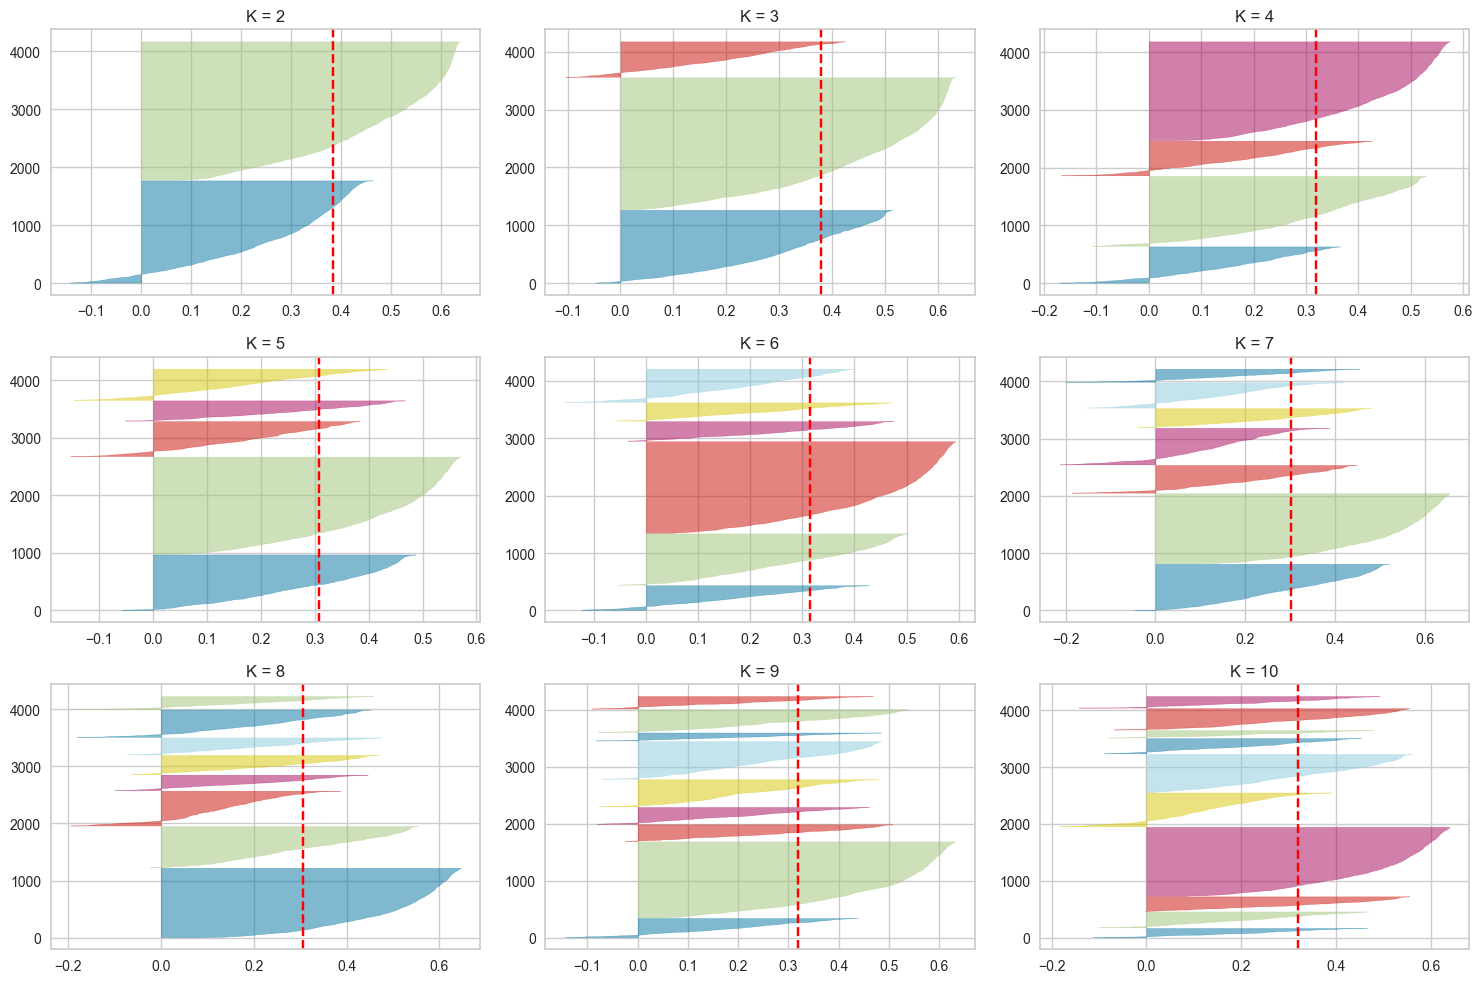

In [923]:
# Display the Silhouette Score and Plot Silhouette Plot
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Loop for each plot
for i, ax in enumerate(axes.flatten()):

    # Initialize K-means clustering
    n_clusters = i + 2
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

    # Create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)

    # Fit visualizer to data
    visualizer.fit(df_scaled_pca)

    # Set title
    ax.set_title(f'K = {n_clusters}')

# Adjust layout
plt.tight_layout()
plt.show()

- `n_cluster=2` have the highest score for `silhouette score`, means it's the best number of cluster based on `silhouette score`, so we will give it a try.
- Based on the cluster distribution plot result, it seems that `n_cluster=3` provides a best visualization.
- Therefore, it can be concluded that based on the `silhouette Plot`, the optimal number of clusters is `n_clusters=3`.

# 6 - Model Definition

In [924]:
n_cluster_2 = 2
n_cluster_3 = 3
n_cluster_4 = 4

## 6.1 K-Means 2 (Based on Silhouette Score)

In [925]:
km_2 = KMeans(n_clusters = n_cluster_2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
km_2.fit(df_scaled_pca)

KMeans(n_clusters=2, n_init=10, random_state=7)

## 6.2 K-Means 3 (Based on Silhouette Plot)

In [926]:
km_3 = KMeans(n_clusters = n_cluster_3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
km_3.fit(df_scaled_pca)

KMeans(n_clusters=3, n_init=10, random_state=7)

## 6.3 K-Means 4 (Based on Elbow method)

In [927]:
km_4 = KMeans(n_clusters = n_cluster_4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
km_4.fit(df_scaled_pca)

KMeans(n_clusters=4, n_init=10, random_state=7)

# 7 - Model Training

## 7.1 K-Means 2

In [928]:
pred_2 = km_2.predict(df_scaled_pca)

## 7.2 K-Means 3

In [929]:
pred_3 = km_3.predict(df_scaled_pca)

## 7.3 K-Means 4

In [930]:
pred_4 = km_4.predict(df_scaled_pca)

# 8 - Model Evaluation

## 8.1 - K-Means 2

In [931]:
# Insert clustering result into original dataset
df_km_2 = df.copy()
df_km_2['CLUSTER'] = pred_2
df_km_2

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8,1
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8,1
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,1
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,1
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,1
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,1


<Axes: >

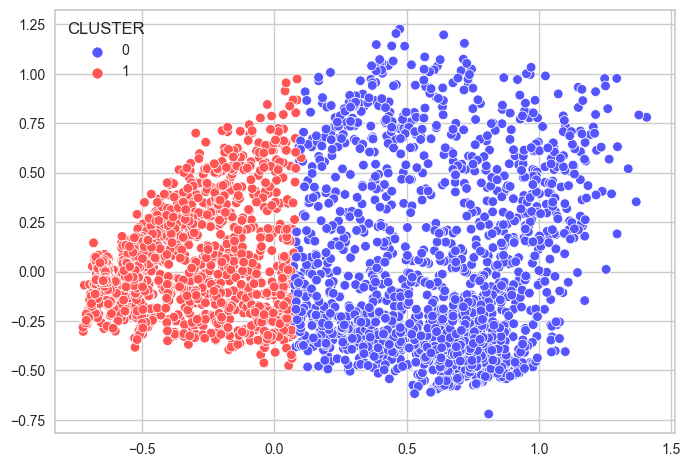

In [932]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled_pca)
sales_scaled_pca_2d = pca_2d.fit_transform(df_scaled_pca)
sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=df_km_2['CLUSTER'], palette='seismic')

In [933]:
# Describte Cluster 0
df_km_2[df_km_2['CLUSTER'] == 0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1726.000000,1762.000000,1762.000000,1762.0
mean,1174.286034,0.927594,1085.594398,438.342140,647.422520,580.618764,0.881230,0.270531,0.728428,0.080767,2.019864,22.645289,4309.709037,1432.796065,826.980462,0.244156,11.527242,0.0
std,1835.473716,0.177477,868.645761,589.253569,630.067217,1856.253622,0.151725,0.342919,0.292132,0.169817,5.941906,20.388856,3388.434024,1909.978803,2514.721346,0.345696,1.353313,0.0
min,0.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.416667,0.000000,0.000000,0.000000,0.000000,4.000000,300.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,77.472825,1.000000,419.670000,0.000000,227.730000,0.000000,0.750000,0.000000,0.583333,0.000000,0.000000,11.000000,1500.000000,438.937824,160.567281,0.000000,12.000000,0.0
50%,378.804765,1.000000,799.920000,124.955000,447.690000,0.000000,1.000000,0.083333,0.833333,0.000000,0.000000,15.000000,3000.000000,941.850830,201.959982,0.000000,12.000000,0.0
75%,1457.694120,1.000000,1559.072500,722.992500,865.027500,195.828493,1.000000,0.500000,1.000000,0.083333,1.000000,27.000000,6000.000000,1750.308255,704.359738,0.444444,12.000000,0.0
max,16115.596400,1.000000,4266.250000,2282.590000,4127.830000,47137.211760,1.000000,1.000000,1.000000,1.000000,123.000000,254.000000,20000.000000,39048.597620,56370.041170,1.000000,12.000000,0.0


In [934]:
# Describte Cluster 1
df_km_2[df_km_2['CLUSTER'] == 1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2387.000000,2270.000000,2387.000000,2387.000000,2387.0
mean,1672.569064,0.827307,233.536037,182.853699,50.734168,1309.959523,0.149149,0.085709,0.061659,0.184031,4.378299,2.698366,4105.770652,1383.220063,812.991985,0.062391,11.465438,1.0
std,1991.491912,0.276003,392.287563,363.423787,147.420678,2098.450973,0.177679,0.138313,0.124240,0.213544,7.847013,4.250084,3274.112760,2156.402720,1823.108830,0.176577,1.366878,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.055880,0.000000,6.000000,1.0
25%,172.968805,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,309.093338,176.442405,0.000000,12.000000,1.0
50%,1063.614099,1.000000,57.000000,0.000000,0.000000,369.950794,0.083333,0.000000,0.000000,0.090909,2.000000,1.000000,3000.000000,672.614794,382.074941,0.000000,12.000000,1.0
75%,2248.246860,1.000000,300.390000,190.000000,0.000000,1836.846509,0.250000,0.090909,0.000000,0.272727,6.000000,4.000000,6000.000000,1505.507418,826.683983,0.000000,12.000000,1.0
max,14581.459140,1.000000,3000.000000,2233.300000,3000.000000,22665.778500,0.750000,0.750000,0.583333,1.500000,123.000000,51.000000,23000.000000,28988.973880,42629.551170,1.000000,12.000000,1.0


In [935]:
def clusterSummary(df, n_cluster):
    balance, cluster, purchases, purchase_trx, credit_limit, payment = [], [], [], [], [], []
    df_cluster = pd.DataFrame()
    for i in range(0, n_cluster):
        cluster.append(f'Cluster {i}')
        balance.append(df[df['CLUSTER'] == i]['BALANCE'].mean())
        purchases.append(df[df['CLUSTER'] == i]['PURCHASES'].mean())
        purchase_trx.append(df[df['CLUSTER'] == i]['PURCHASES_TRX'].mean())
        credit_limit.append(df[df['CLUSTER'] == i]['CREDIT_LIMIT'].mean())
        payment.append(df[df['CLUSTER'] == i]['PAYMENTS'].mean())
    df_cluster['CLUSTER'] = cluster
    df_cluster['PURCHASES'] = purchases
    df_cluster['PURCHASES_TRX'] = purchase_trx
    df_cluster['CREDIT_LIMIT'] = credit_limit
    #df_cluster['BALANCE'] = balance
    df_cluster['PAYMENTS'] = payment
    df_cluster = df_cluster.sort_values('PURCHASES')
    return df_cluster

In [936]:
df_cluster_2 = clusterSummary(df_km_2, n_cluster_2)
df_cluster_2

,CLUSTER,PURCHASES,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS
1,Cluster 1,233.536037,2.698366,4105.770652,1383.220063
0,Cluster 0,1085.594398,22.645289,4309.709037,1432.796065


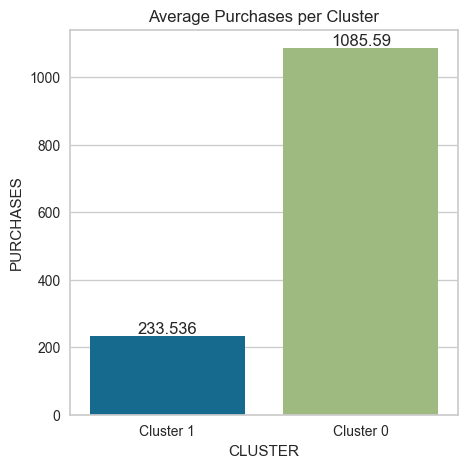

In [937]:
plt.subplots(figsize=(5, 5))
ax = sns.barplot(data=df_cluster_2, x='CLUSTER', y='PURCHASES', orient='v')
ax.bar_label(ax.containers[0])
ax.set(title='Average Purchases per Cluster')
plt.show()

Above are the result of clustering using `n_cluster=2`, as we can see :
- The average purchase of `Cluster 0` and `Cluster 1` is far apart, customer at `Cluster 1` are those _who use their credit card less_ to purchase item compared to `Cluster 0`

- The average amount of transaction is showing the same thing, `Cluster 0` made _more transaction_ than `Cluster 1`.

- But for average credit limit, both of the cluster have almost the _same value_. We can assume this as there is no correlation between customer credit limit to their desire to make a purchase using credit card.

- Altough `Cluster 1` purchases is less than `Cluster 0`, but they tend to _pay more_ than `Cluster 0` in terms of paying off their credit card.

## 8.2 - K-Means 3

In [938]:
# Insert clustering result into original dataset
df_km_3 = df.copy()
df_km_3['CLUSTER'] = pred_3
df_km_3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8,1
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8,1
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,1
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,1
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,1
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,1
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,1


<Axes: >

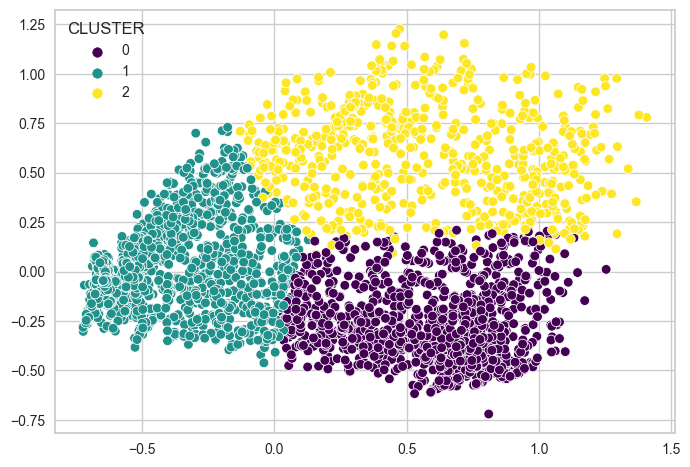

In [939]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=3)
pca_2d.fit(df_scaled_pca)
sales_scaled_pca_2d = pca_2d.fit_transform(df_scaled_pca)
sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=df_km_3['CLUSTER'], palette='viridis')

In [940]:
# Describte Cluster 0
df_km_3[df_km_3['CLUSTER'] == 0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1225.000000,1258.000000,1258.000000,1258.0
mean,1030.758078,0.907258,795.783657,124.793895,671.228235,496.197764,0.865947,0.069727,0.815339,0.070419,1.584261,18.554054,3737.345032,1160.246760,915.958442,0.241838,11.429253,0.0
std,1769.964839,0.202382,701.906234,234.418181,623.507288,1420.212210,0.163755,0.112017,0.188940,0.153578,4.162526,18.116805,3169.236584,1486.682629,2939.884240,0.341686,1.493610,0.0
min,0.000000,0.000000,58.320000,0.000000,25.920000,0.000000,0.416667,0.000000,0.333333,0.000000,0.000000,3.000000,300.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,51.115375,0.909091,315.885000,0.000000,265.200000,0.000000,0.750000,0.000000,0.666667,0.000000,0.000000,10.000000,1500.000000,348.129781,149.617347,0.000000,12.000000,0.0
50%,240.099603,1.000000,555.050000,0.000000,459.965000,0.000000,0.916667,0.000000,0.857143,0.000000,0.000000,12.000000,2500.000000,697.278070,188.697505,0.000000,12.000000,0.0
75%,1246.566870,1.000000,1051.280000,153.197500,857.632500,101.418336,1.000000,0.083333,1.000000,0.083333,1.000000,22.000000,5000.000000,1369.600600,688.136600,0.444444,12.000000,0.0
max,16115.596400,1.000000,4235.280000,1537.820000,4127.830000,16323.642430,1.000000,0.583333,1.000000,1.000000,43.000000,254.000000,19500.000000,15172.585350,56370.041170,1.000000,12.000000,0.0


In [941]:
# Describte Cluster 1
df_km_3[df_km_3['CLUSTER'] == 1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2280.000000,2167.000000,2280.000000,2280.000000,2280.0
mean,1683.445621,0.823564,203.921395,155.635588,48.340070,1358.748113,0.131117,0.072334,0.056882,0.187764,4.525877,2.257018,4112.642344,1402.683608,824.141874,0.060427,11.461842,1.0
std,2008.488194,0.279213,352.234170,318.521790,146.807508,2327.620978,0.159753,0.112639,0.116231,0.213677,8.337402,3.359634,3290.524488,2320.756278,1860.249594,0.174298,1.365384,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.055880,0.000000,6.000000,1.0
25%,174.146189,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,308.104956,176.443407,0.000000,12.000000,1.0
50%,1075.400526,1.000000,45.650000,0.000000,0.000000,409.075080,0.083333,0.000000,0.000000,0.100000,2.000000,1.000000,3000.000000,665.203966,381.650944,0.000000,12.000000,1.0
75%,2255.297969,1.000000,261.230000,166.375000,0.000000,1865.288435,0.250000,0.083333,0.000000,0.285714,6.000000,4.000000,6000.000000,1513.648173,828.822462,0.000000,12.000000,1.0
max,14581.459140,1.000000,3000.000000,2233.300000,3000.000000,47137.211760,0.666667,0.583333,0.500000,1.500000,123.000000,32.000000,23000.000000,39048.597620,42629.551170,1.000000,12.000000,1.0


In [942]:
# Describte Cluster 2
df_km_3[df_km_3['CLUSTER'] == 2].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,611.000000,604.000000,611.000000,611.000000,611.0
mean,1516.472453,0.965868,1643.586301,1140.737758,502.848543,700.100099,0.851781,0.701511,0.450548,0.106223,2.779051,29.222586,5426.804047,1912.641418,604.131708,0.224425,11.731588,2.0
std,1885.405855,0.099100,867.078720,535.252229,615.694452,1600.993090,0.179165,0.242260,0.379309,0.201251,6.685337,21.854876,3466.737127,1914.637769,746.938363,0.339981,0.985119,0.0
min,0.413670,0.181818,8.400000,8.400000,0.000000,0.000000,0.333333,0.083333,0.000000,0.000000,0.000000,4.000000,300.000000,0.000000,9.925051,0.000000,6.000000,2.0
25%,218.136618,1.000000,939.045000,705.300000,0.000000,0.000000,0.727273,0.500000,0.000000,0.000000,0.000000,14.000000,2500.000000,867.403458,178.306948,0.000000,12.000000,2.0
50%,799.274442,1.000000,1526.590000,1077.750000,257.950000,0.000000,0.916667,0.666667,0.416667,0.000000,0.000000,23.000000,5000.000000,1474.677315,269.562378,0.000000,12.000000,2.0
75%,2067.552145,1.000000,2217.770000,1545.010000,763.580000,448.062061,1.000000,0.916667,0.833333,0.105555,2.000000,36.000000,7500.000000,2323.052499,752.386190,0.333333,12.000000,2.0
max,11206.786240,1.000000,4266.250000,2282.590000,3287.800000,14811.688180,1.000000,1.000000,1.000000,1.000000,51.000000,151.000000,20000.000000,20873.221940,6825.442030,1.000000,12.000000,2.0


In [943]:
df_cluster_3 = clusterSummary(df_km_3, n_cluster_3)
df_cluster_3

,CLUSTER,PURCHASES,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS
1,Cluster 1,203.921395,2.257018,4112.642344,1402.683608
0,Cluster 0,795.783657,18.554054,3737.345032,1160.246760
2,Cluster 2,1643.586301,29.222586,5426.804047,1912.641418


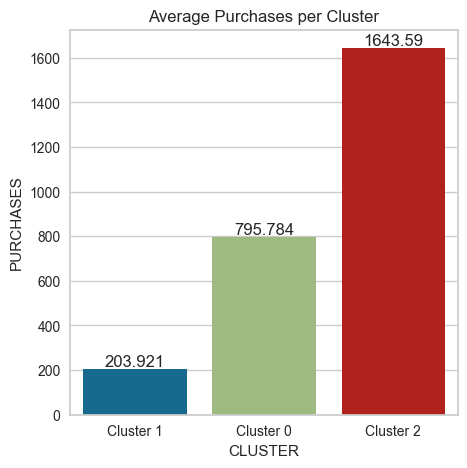

In [944]:
plt.subplots(figsize=(5, 5))
ax = sns.barplot(data=df_cluster_3, x='CLUSTER', y='PURCHASES', orient='v')
ax.bar_label(ax.containers[0])
ax.set(title='Average Purchases per Cluster')
plt.show()

Above are the result of clustering using `n_cluster=3`, as we can see :
- The average purchase of `Cluster 0`, `Cluster 1` and `Cluster 2` is well separated, customer at `Cluster 1` are those _who use their credit card less_ to purchase item, then `Cluster 0` in the middle, who use their credit card more than `Cluster 1` but less than `Cluster 2`. And last `Cluster 2` looks like a customer with high income, their average purchases is high, average amount of transaction is 29+ transaction.

- The average amount of transaction is showing the same thing, `Cluster 0` made _more transaction_ than `Cluster 1` and as said before, `Cluster 2` has highest average amount of transaction.

- Meanwhile for average credit limit, `Cluster 1` and `Cluster 0` is almost the same, but `Cluster 2` is different, their average credit limit is surprisingly high. We can assume this segment is filled with people who have high income, because it's not easy to get high credit limit if we don't have much money.

- Also for `Cluster 2` they tend to _pay more_ than `Cluster 1` and `Cluster 2` in terms of paying off their credit card. This is very normal for `Cluster 2` if we assume if they are high-income customer.

## 8.3 - K-Means 4

In [945]:
# Insert clustering result into original dataset
df_km_4 = df.copy()
df_km_4['CLUSTER'] = pred_4
df_km_4

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8,0
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8,0
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,3
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,0
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,3
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,3
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,3
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,3


<Axes: >

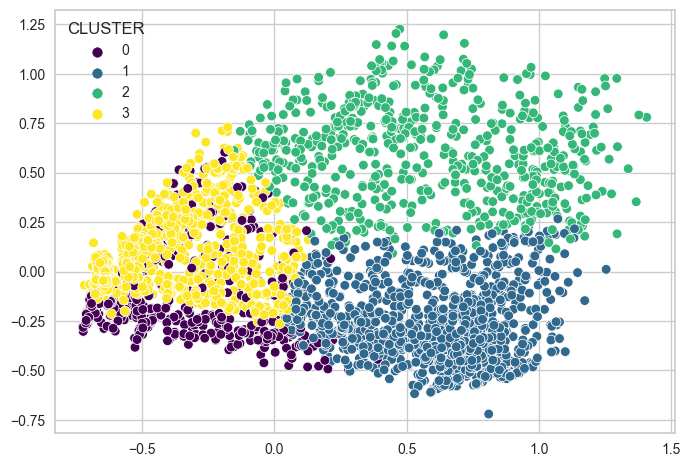

In [946]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=4)
pca_2d.fit(df_scaled_pca)
sales_scaled_pca_2d = pca_2d.fit_transform(df_scaled_pca)
sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=df_km_4['CLUSTER'], palette='viridis')

In [947]:
# Describte Cluster 0
df_km_4[df_km_4['CLUSTER'] == 0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,627.000000,538.000000,627.000000,627.000000,627.0
mean,155.572774,0.393960,283.058501,192.077289,91.016300,460.778883,0.200355,0.075176,0.116958,0.054464,1.105263,3.185008,3851.121744,1177.032851,156.605124,0.205921,11.192982,0.0
std,315.508645,0.194184,390.218815,370.818105,170.600354,1159.553842,0.180893,0.108947,0.168335,0.099681,2.465433,3.632156,3330.406329,2689.220664,180.266752,0.323018,1.702117,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.055880,0.000000,6.000000,0.0
25%,8.062807,0.272727,19.575000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,150.474111,70.037348,0.000000,12.000000,0.0
50%,31.870622,0.428571,128.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,2.000000,3000.000000,357.296220,116.009603,0.000000,12.000000,0.0
75%,142.834812,0.545455,373.985000,197.495000,121.950000,314.197150,0.333333,0.083333,0.250000,0.083333,1.000000,5.000000,5000.000000,1085.027746,166.945868,0.333333,12.000000,0.0
max,2316.110930,0.833333,2308.000000,2214.870000,1700.000000,14371.787890,0.833333,0.666667,0.750000,0.500000,24.000000,31.000000,23000.000000,28988.973880,1863.225391,1.000000,12.000000,0.0


In [948]:
# Describte Cluster 1
df_km_4[df_km_4['CLUSTER'] == 1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1211.000000,1183.000000,1211.000000,1211.000000,1211.0
mean,1059.262580,0.923687,826.867770,133.347374,693.768126,506.261642,0.881393,0.073078,0.831823,0.071363,1.595376,19.222956,3758.365029,1185.103098,940.002916,0.231083,11.431049,1.0
std,1783.708799,0.184064,726.970332,247.539350,639.121215,1438.029061,0.150718,0.115260,0.177290,0.152488,4.118266,18.488455,3196.217200,1496.711270,2987.940389,0.334786,1.487966,0.0
min,0.000000,0.000000,58.320000,0.000000,25.920000,0.000000,0.500000,0.000000,0.400000,0.000000,0.000000,4.000000,400.000000,0.000000,0.019163,0.000000,6.000000,1.0
25%,59.094172,1.000000,329.275000,0.000000,274.950000,0.000000,0.750000,0.000000,0.666667,0.000000,0.000000,10.000000,1500.000000,362.062009,152.916775,0.000000,12.000000,1.0
50%,283.899006,1.000000,574.140000,0.000000,475.360000,0.000000,1.000000,0.000000,0.888889,0.000000,0.000000,12.000000,2500.000000,716.423692,193.830954,0.000000,12.000000,1.0
75%,1276.411582,1.000000,1102.000000,172.055000,896.610000,131.539159,1.000000,0.090909,1.000000,0.083333,1.000000,22.000000,5000.000000,1410.876773,711.883421,0.416667,12.000000,1.0
max,16115.596400,1.000000,4235.280000,1680.700000,4127.830000,16323.642430,1.000000,0.583333,1.000000,1.000000,43.000000,254.000000,19500.000000,15172.585350,56370.041170,1.000000,12.000000,1.0


In [949]:
# Describte Cluster 2
df_km_4[df_km_4['CLUSTER'] == 2].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,593.000000,600.000000,600.000000,600.0
mean,1519.034583,0.968434,1632.991417,1143.967367,489.024050,717.812700,0.851623,0.707381,0.445237,0.108706,2.845000,29.036667,5411.795455,1909.622142,609.814120,0.224571,11.733333,2.0
std,1883.942296,0.093591,859.480963,539.709435,595.454849,1618.142117,0.178324,0.239659,0.377047,0.203654,6.748349,21.868067,3473.411515,1924.818534,750.971024,0.340202,0.981748,0.0
min,0.413670,0.181818,8.400000,8.400000,0.000000,0.000000,0.285714,0.083333,0.000000,0.000000,0.000000,4.000000,300.000000,0.000000,9.925051,0.000000,6.000000,2.0
25%,218.781250,1.000000,933.897500,703.492500,0.000000,0.000000,0.727273,0.500000,0.000000,0.000000,0.000000,14.000000,2500.000000,866.513923,178.466749,0.000000,12.000000,2.0
50%,808.262927,1.000000,1526.480000,1082.045000,252.955000,0.000000,0.916667,0.666667,0.416667,0.000000,0.000000,23.000000,5000.000000,1459.411754,269.813501,0.000000,12.000000,2.0
75%,2070.208789,1.000000,2205.817500,1557.017500,754.885000,461.059426,1.000000,1.000000,0.821970,0.135417,2.000000,36.000000,7500.000000,2293.835662,758.281597,0.333333,12.000000,2.0
max,11206.786240,1.000000,4266.250000,2282.590000,3287.800000,14811.688180,1.000000,1.000000,1.000000,1.000000,51.000000,151.000000,20000.000000,20873.221940,6825.442030,1.000000,12.000000,2.0


In [950]:
# Describte Cluster 3
df_km_4[df_km_4['CLUSTER'] == 3].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
count,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1711.000000,1682.000000,1711.000000,1711.000000,1711.0
mean,2203.262702,0.971680,182.149883,140.580994,41.628340,1646.548695,0.119686,0.070836,0.048427,0.231326,5.656341,2.129749,4197.002462,1465.458926,1019.597683,0.020710,11.559322,3.0
std,2080.358637,0.070495,333.695840,292.775875,145.625325,2531.782922,0.161594,0.114656,0.110117,0.224322,9.271346,3.445753,3254.688231,2137.734782,2069.487887,0.062422,1.212443,0.0
min,1.355556,0.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,8.561540,0.000000,6.000000,3.0
25%,861.536793,1.000000,0.000000,0.000000,0.000000,55.709815,0.000000,0.000000,0.000000,0.083333,1.000000,0.000000,1550.000000,385.217597,271.603808,0.000000,12.000000,3.0
50%,1500.034488,1.000000,0.000000,0.000000,0.000000,759.000431,0.000000,0.000000,0.000000,0.166667,3.000000,0.000000,3000.000000,764.938728,510.159655,0.000000,12.000000,3.0
75%,2843.518313,1.000000,219.900000,150.025000,0.000000,2316.641166,0.200000,0.083333,0.000000,0.333333,7.000000,3.000000,6000.000000,1626.911248,1078.429615,0.000000,12.000000,3.0
max,14581.459140,1.000000,3000.000000,2233.300000,3000.000000,47137.211760,0.666667,0.583333,0.500000,1.500000,123.000000,32.000000,19600.000000,39048.597620,42629.551170,0.666667,12.000000,3.0


In [951]:
df_cluster_4 = clusterSummary(df_km_4, n_cluster_4)
df_cluster_4

,CLUSTER,PURCHASES,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS
3,Cluster 3,182.149883,2.129749,4197.002462,1465.458926
0,Cluster 0,283.058501,3.185008,3851.121744,1177.032851
1,Cluster 1,826.867770,19.222956,3758.365029,1185.103098
2,Cluster 2,1632.991417,29.036667,5411.795455,1909.622142


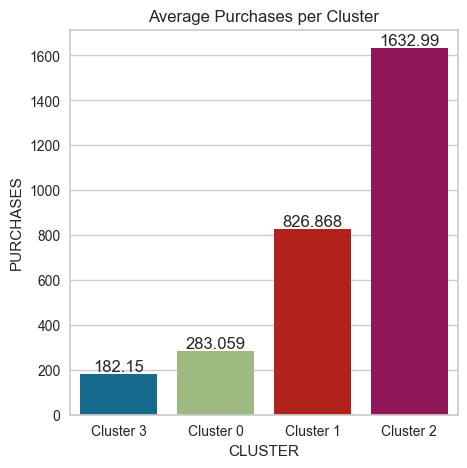

In [952]:
plt.subplots(figsize=(5, 5))
ax = sns.barplot(data=df_cluster_4, x='CLUSTER', y='PURCHASES', orient='v')
ax.bar_label(ax.containers[0])
ax.set(title='Average Purchases per Cluster')
plt.show()

Above are the result of clustering using `n_cluster=4`, as we can see :
- The average purchase of `Cluster 0`, `Cluster 1` and `Cluster 2` is well separated, but there is slightly different between `Cluster 3` and `Cluster 0`. This indicates that the clustering is bad because we didn't see the significant difference among the cluster. Even though the other cluster is still showing clear diversity.

- The average amount of transaction is showing the same thing, `Cluster 3` and `Cluster 0` have very little difference with the average 2 and 3 transaction. But for the other cluster it's work well and the difference gap is good.

- For the average credit limit and average payments, `Cluster 3` and `Cluster 0` also have very similar amount. This means the model can't differentiate `Cluster 3` and `Cluster 0`, because the data is too similar.

# 9 - Model Analysis

- Based on the k-means we tried which is 2, 3 and 4. K-means 2 and 3 depict a good segmentation. Meanwhile with k-means 4 we have a cluster that only having a very little different each other. And between k-means 2 and 3, we decided to choose **k-means 3 as the best/optimal k-means/number of cluster**.

- The reason we choose k-means 3 as the best/optimal k-means even though 2 and 3 has a good result is because k-means 3 have more separate cluster that we can see the difference which k-means 2 doesn't have. Which is `Cluster 2` from k-means 3, this segmentation showing that the customer with high-income based on their credit card limit and also high-spending based on their purchases and amount of purchases. While on k-means 2 we can't see this at their `Cluster 0`.

# 10 - Conclusion

In [953]:
df_cluster_3 = clusterSummary(df_km_3, n_cluster_3)
df_cluster_3

,CLUSTER,PURCHASES,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS
1,Cluster 1,203.921395,2.257018,4112.642344,1402.683608
0,Cluster 0,795.783657,18.554054,3737.345032,1160.246760
2,Cluster 2,1643.586301,29.222586,5426.804047,1912.641418


Based on the k-means 3 result and model analysis we can conclude that :
- `Cluster 1` is customer who have average income and didn't use their credit card very often as we can see their purchases is low although they have decent credit card limit. But they tend to pay their bill better than `Cluster 0`

- `Cluster 0` is customer who have same average income with `Cluster 1` because their average credit limit is about the same, but `Cluster 0` use their credit card more often as we can see their purchases and transaction amount is much more than `Cluster 1`. In terms of payment, `Cluster 0` tend to pay their bill less than `Cluster 1` even though they have more bill.

- `Cluster 2` is customer who have high-income based on how high their credit card limit is. They also use their credit card very often, their purchases is very high, their transaction amount is also plenty. Also they tend to pay their bills more than the other cluster, because their bill is the highest too.

`Strength` and `Weakness`
- `Strength` of this model is it can clearly differentiate between low, medium and high spending customer. Also can separate the number of customer transactions well.
- `Weakness` of this model is it can only separate 3 segment, more than 3 segment will the model give bad result. It can't determine more details of customer behavior. For example it can't differentiate between customer that having low-income low-spender, low-income high-spender etc.

For future improvement, the bank can use this segmentation information to give their customer reward and promotion based on their segment. For example : 
- Bank can give `Cluster 2` a reward for using their credit card very often, so this customer will feel appreciated and respected. For high-income customer, appreciating them is more important rather than give them a discount or promotion.

- Whilst for `Cluster 1` can give them a promotion/discount for a relatively low-cost item if they use credit card to attract them for using their credit card more.

# 11 - Model Saving for Inference Dataset

In [954]:
#MODEL
with open('km_3.pkl', 'wb') as file_1:
    pickle.dump(km_3, file_1)

#SCALER
with open('model_scaler_mm.pkl', 'wb') as file_2:
    pickle.dump(scaler_mm, file_2)

#NUMERICAL
with open('list_num_column_skew.txt', 'wb') as file_3:
    pickle.dump(df.columns.to_list(), file_3)

#PCA
with open('pca.txt', 'wb') as file_4:
    pickle.dump(pca, file_4)

# 12 - Conceptual Problem

## 12.1 - What is `inertia` in K-Means algorithm ?

Inertia, also known as within-cluster sum of squares (WCSS), is a metric used to evaluate the quality of a clustering solution produced by the k-means algorithm. It measures the compactness of clusters in the context of the k-means algorithm. A good model is one with low inertia AND a low number of clusters (K). However, this is a tradeoff because as K increases, inertia decreases.

## 12.2 - Explain what is `Elbow Method` ? (Reason, How to use, strength/weakness)

The elbow method is a popular technique used to determine the optimal number of clusters (k) for a dataset when using the k-means clustering algorithm. It involves running the k-means algorithm for a range of values of k and plotting the within-cluster sum of squares (WCSS), also known as inertia, for each value of k.
- `Reason`<br>The elbow method is relatively simple to implement. It doesn't require complex calculations or domain-specific knowledge, making it accessible for both beginners and experienced data analysts.

- `How to use`<br>1. Choose a range of values for k (the number of clusters) that you want to test. Typically, you would select a range of values from 1 to some reasonable upper limit.<br>2. For each value of k, run the k-means algorithm and calculate the WCSS (inertia) for that specific k. The WCSS is computed as the sum of squared distances between data points and the centroids of their clusters.<br>3. Plot a graph where the x-axis represents the number of clusters (k) and the y-axis represents the corresponding WCSS values.<br>4. Examine the plot. You will typically observe a curve that decreases as the number of clusters increases. The idea behind the elbow method is to find the "elbow" point on this curve, which is the point where the rate of decrease in WCSS slows down significantly. The location of the elbow suggests an optimal number of clusters.

- `Strength and Weakness`<br>**Strength** : It is relatively simple to implement and doesn't require specialized knowledge or complex calculations, making it accessible to a wide range of users, including those new to clustering.<br>**Weakness** : In some cases, the "elbow" in the WCSS plot is not well-defined, making it challenging to pinpoint the optimal number of clusters. The curve may not exhibit a distinct elbow, which can create ambiguity.